In [ ]:
import shap
import pandas as pd
import numpy as np
from xgboost import XGBRegressor  # Ensure you have XGBoost installed
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import matplotlib as mpl

# Load the CSV file
df = pd.read_csv('final_files/top_30_rain_shited.csv')

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['DejaVu Serif'] 


# Mapping for renaming columns with subscripts and more readable names
subscript_mapping = {
    'tasmax': 'Tasₘₐₓ',
    'tasmin': 'Tasₘᵢₙ',
    'soilmoisture' : 'Soil moisture',
    'humidity' : 'Humidity',
    'forestcoverfraction' : 'Forest cover fraction',
    'population' : 'Population',
    'cloudcover' : 'Cloud cover',
    'windspeed' : 'Wind speed',
    'rain_shifted' : 'Prev year avg rain'
}

# Rename columns based on the mapping
df = df.rename(columns=lambda x: subscript_mapping[x] if x in subscript_mapping else x)

# Assuming the entire dataframe is used for training
random_sample = df

# Separate input and output variables
X = random_sample.iloc[:, :-1]  # Input variables
y = random_sample.iloc[:, -1]   # Output variable

# Train the model using XGBoost (The params are extracted from grid search results (Slightly different for differnet clusters))
model = XGBRegressor(
    colsample_bytree=1.0, 
    learning_rate=0.05, 
    max_depth=15, 
    n_estimators=250, 
    subsample=0.8
)
model.fit(X, y)

# Create a SHAP explainer object using TreeExplainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X)

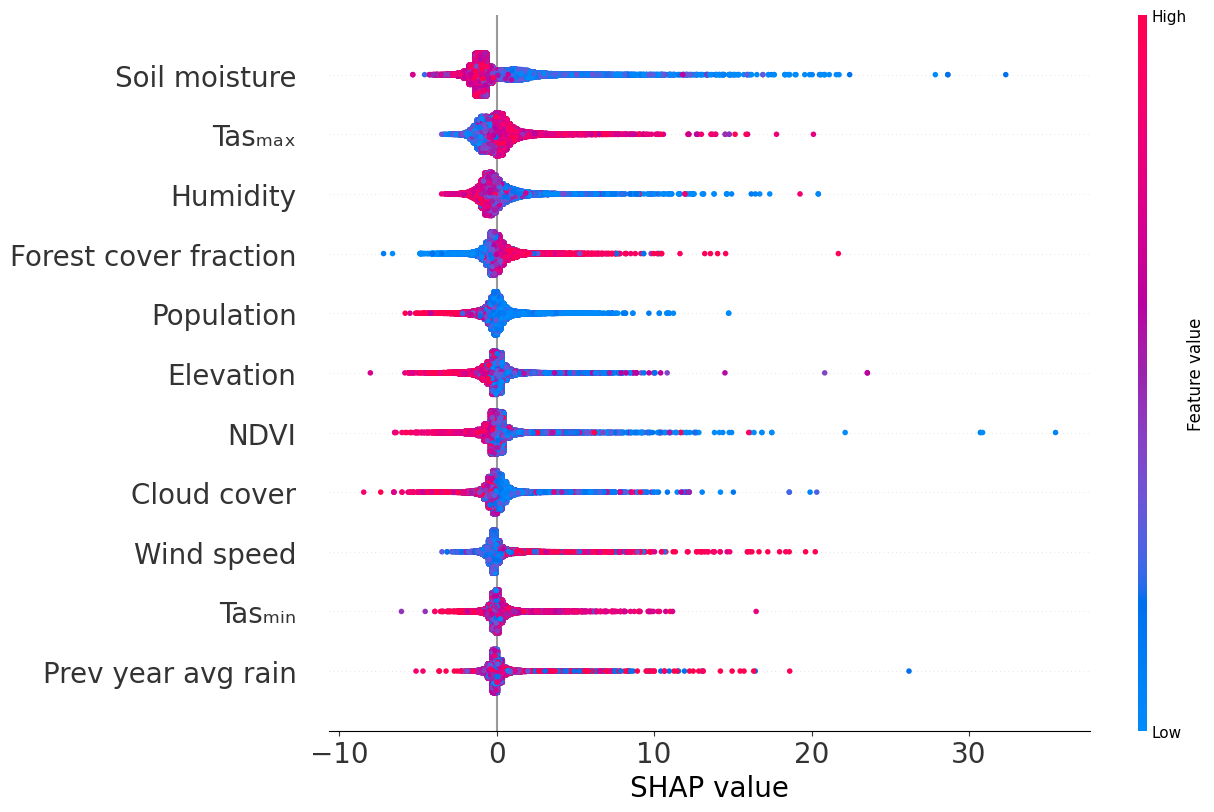

In [ ]:
plt.figure()  # Create a new figure
shap.summary_plot(shap_values, X, show=False, plot_size=(12, 8))  # Increase plot size for better readability

# Adjusting the font size of the feature names
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontsize=20)

# Adjust x-tick size and remove the default x-label
plt.xticks(fontsize=20)
plt.xlabel('SHAP value',fontsize=20)

# Save the plot in SVG format
plt.savefig('final_shap_plts/top30.svg', format='svg', bbox_inches='tight')  # Change to your desired path and filename
#plt.savefig('final_shap_plot/normal/top30.png',dpi=500, bbox_inches='tight')
# Optionally display the plot
plt.show()

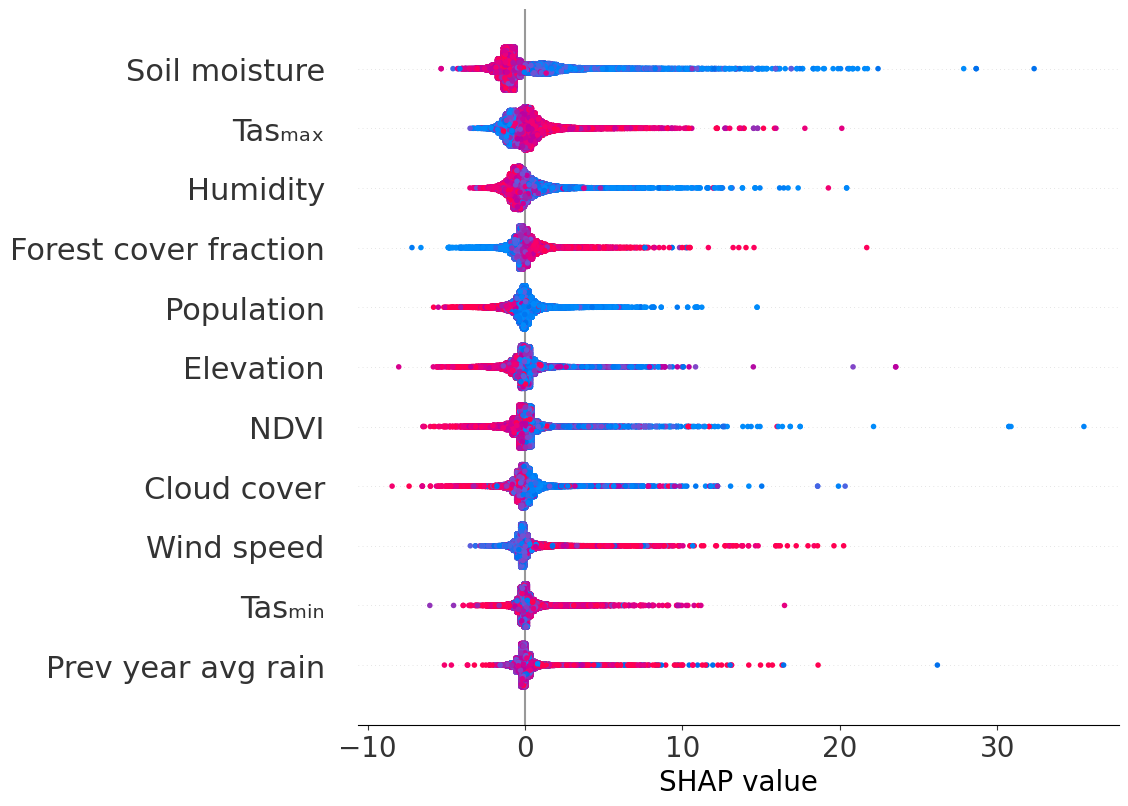

In [6]:
plt.figure()  # Create a new figure
shap.summary_plot(shap_values, X, show=False, plot_size=(12, 8))  # Increase plot size for better readability

# Adjusting the font size of the feature names
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontsize=22)

# Adjust x-tick size and remove the default x-label
plt.xticks(fontsize=20)
plt.xlabel('SHAP value',fontsize=20)

# Remove the color bar
color_bar = plt.gcf().get_axes()[-1]  # Get the color bar axis
color_bar.remove()

# Save the plot in SVG format
#plt.savefig('final_shap_plot/no_bar/top30.svg', format='svg', bbox_inches='tight')  # Change to your desired path and filename
plt.savefig('final_shap/cluster0.png',dpi=500, bbox_inches='tight')
# Optionally display the plot
plt.show()

In [ ]:
# Calculate the average absolute SHAP values for each feature
average_abs_shap_values = pd.DataFrame(shap_values).abs().mean()

# Set feature names as the index of the DataFrame
average_abs_shap_values.index = X.columns

# Sort the average absolute SHAP values in descending order
average_abs_shap_values_sorted = average_abs_shap_values.sort_values(ascending=False)
average_abs_shap_values_sorted.to_csv('average_abs_shap_values_top30.csv', header=['Average Absolute SHAP Value'])